In [1]:
%config InlineBackend.figure_format='retina'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import matplotlib as mpl

# macOS下中文字体需要额外设置，Windows下注意字体路径不同
zhfont=mpl.font_manager.FontProperties(fname="/System/Library/Fonts/Supplemental/Songti.ttc")

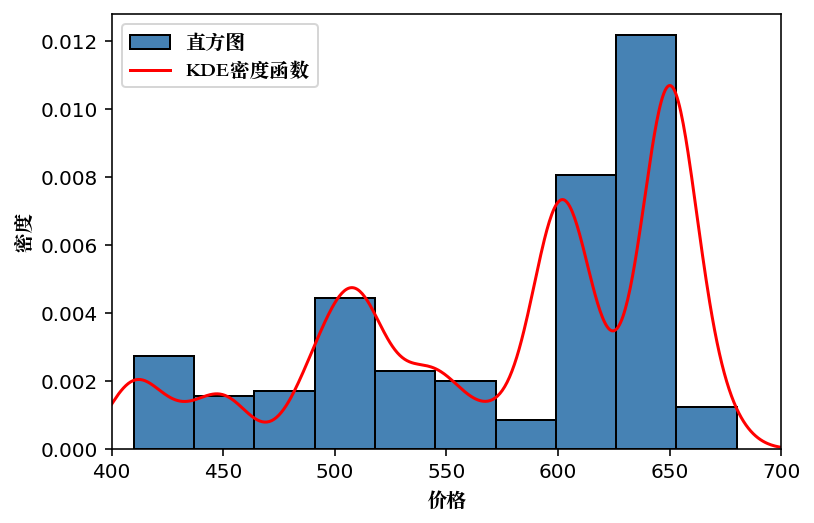

In [3]:
df = pd.read_csv('core_data.csv')
P_list = []
for row in df.iterrows():
    num = int(row[1]['seats'])
    for i in range(num):
        P_list.append(row[1]['prices'])
P_df = pd.DataFrame({'Prices':P_list})

P_df.Prices.plot(kind = 'hist', bins = 10, color = 'steelblue', edgecolor = 'black', density=True, label = '直方图')
P_df.Prices.plot(kind = 'kde', color = 'red', label = 'KDE密度函数')

plt.xlim(400,700)
plt.xlabel('价格',fontproperties=zhfont)
plt.ylabel('密度',fontproperties=zhfont)

plt.legend(prop=zhfont)
plt.show()

In [4]:
K_data = np.array(P_list).reshape(-1,1)

for i in range(5,10):
    KM = KMeans(n_clusters=i)
    KM.fit(K_data)
    pred = KM.predict(K_data)
    unique,count = np.unique(pred,return_counts=True)
    min_rate = count.min()/K_data.shape[0]
    print('-----')
    print('k='+str(i))
    print(KM.cluster_centers_)
    print(min_rate)

-----
k=5
[[650.31393383]
 [504.17630058]
 [427.71730915]
 [601.67394469]
 [547.78846154]]
0.1000699790062981
-----
k=6
[[504.52554745]
 [650.31393383]
 [601.67394469]
 [547.78846154]
 [415.11242604]
 [450.84168337]]
0.04364940517844647
-----
k=7
[[504.52554745]
 [648.30274009]
 [415.11242604]
 [601.67394469]
 [547.78846154]
 [450.84168337]
 [670.10471204]]
0.033414975507347795
-----
k=8
[[513.93624394]
 [648.30274009]
 [415.11242604]
 [601.67394469]
 [551.39852787]
 [450.84168337]
 [493.76397516]
 [670.10471204]]
0.033414975507347795
-----
k=9
[[571.06463878]
 [493.76397516]
 [648.30274009]
 [415.11242604]
 [601.89705882]
 [450.84168337]
 [511.456     ]
 [670.10471204]
 [542.04620462]]
0.023005598320503848
